In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data=pd.read_csv('diabetes.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Variables in the dataset

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

1) Pregnancies : Number of times pregnant

2) Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3) BloodPressure : Diastolic blood pressure (mm Hg)

4) SkinThickness : Triceps skin fold thickness (mm)

5) Insulin : 2-Hour serum insulin (mu U/ml)

6) BMI : Body mass index (weight in kg/(height in m)^2)

7) DiabetesPedigreeFunction : Diabetes pedigree function

8) Age : Age (years)

9) Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0


Total rows and columns in the dataset

In [ ]:
data.shape

(768, 9)

In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Missing Value Detection and Treatment

The following values in a data set are considered to be missing values -

->Blank Values

->NaN

->null

->Some countinuous columns might have 0's to indicate missing data

Counting total records with respect to each variable

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Here the variables like : pregnancies,glucose,BP,skinthickness,Insulin,BMI are having min. value zero

It makes sence to have 0 pregnancies.so except this variable we need to replace the missing data in the other columns.

**Replacing the 0's with Nan**

In [ ]:
from numpy import nan
data['Glucose']=data['Glucose'].replace(0,np.nan)
data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)
data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)
data['Insulin']=data['Insulin'].replace(0,np.nan)
data['BMI']=data['BMI'].replace(0,np.nan)

Checking whether the 0's are replaced with NaN or not

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Counting total NaN values in the dataset

In [ ]:
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


As inferred columns glucose, Blood Preassure, Skin Thickness, Insulin and BMI have missing data.

Glucose, Blood Preassure and BMI have less number of missing data but

skin thickness and Insulin have a very high amount of missing data.

Removing these missing data from the data set will result in information loss and it is not advisable to remove these records.

Hence we will impute these missing values with the median of their respective columns, since median is the least affected by outliers.

In [ ]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [ ]:
# missing values with their respective columns median
data.fillna(data.median(), inplace=True)
# Checking if the missing values have been imputed 
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Pairplot using seaborn **

The graph is plotted between every two variables of the dataset

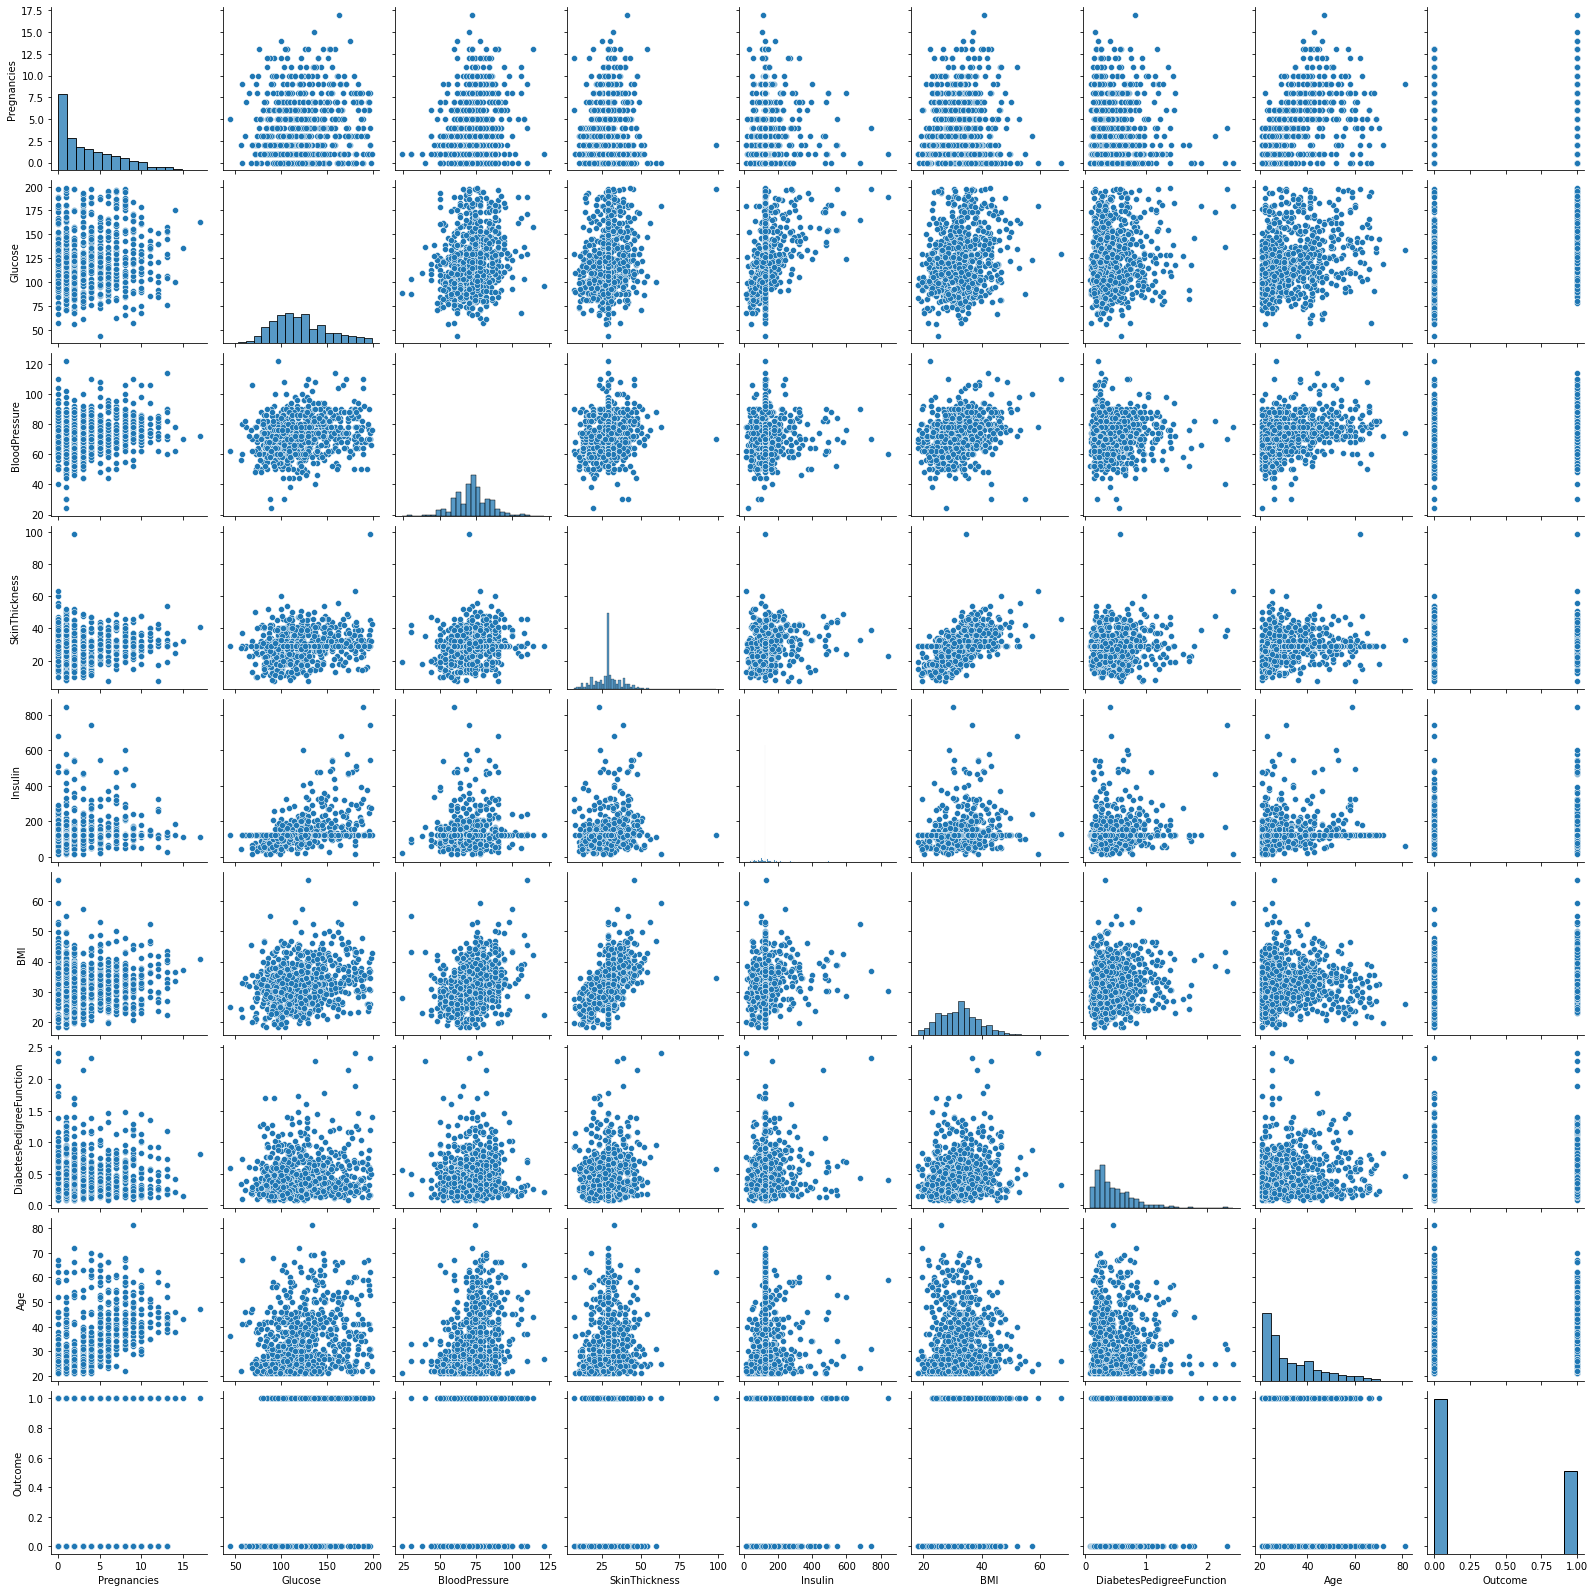

In [ ]:
sns.pairplot(data)

## **Building a Machine Learning Linear Regression Model**

The first thing we need to do is split our data into an x-array (which contains the data that we will use to make predictions) and a y-array (which contains the data that we are trying to predict).

In [ ]:
x=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=data[['Outcome']]

## **Splitting our Data Set into Training Data and Test Data**

scikit-learn makes it very easy to divide our data set into training data and test data. To do this, we’ll need to import the function train_test_split from the model_selection module of scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split

The train_test_split data accepts three arguments:

Our x-array

Our y-array

The desired size of our test data

With these parameters, the train_test_split function will split our data.If we want our test data to be 30% of the entire data set:give test size as 30%



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

The train_test_split function returns a Python list of length 4, where each item in the list is x_train, x_test, y_train, and y_test, respectively.

## **Building and Training the Model**

import the LinearRegression estimator from scikit-learn.

In [ ]:
from sklearn.linear_model import LinearRegression

Creating an instance of the Linear Regression Python object.

In [ ]:
model=LinearRegression()

**scikit-learn’s fit method is used to train this model on our training data.**


In [ ]:
model.fit(x_train,y_train)

LinearRegression()

## Model is trained

Examining each of the model's coefficients

In [ ]:
print(model.coef_)

[[ 0.0246319   0.00665784 -0.00144002 -0.00049824 -0.00044018  0.01699132
   0.08298198  0.00033713]]


Here the coefficient for glucose column is 6.648

This means one-unit increase in glucose will result in 6.648-unit increase in the predicted variable -in this case,Outcome(variable).

Finding the intercepts

In [ ]:
print(model.intercept_)

[-0.95888102]


## **Making Predictions From Model**

Calling the predict method on the model variable that we created earlier.

Since the predict variable is designed to make predictions, it only accepts an x-array parameter. It will generate the y values.

In [ ]:
predictions=model.predict(x_test)

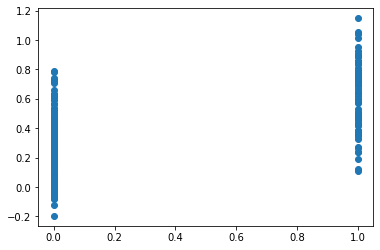

In [ ]:
plt.scatter(y_test,predictions)

our predicted values are very close to the actual values for the observations in the data set.Outcome(output variable) has either 0 or 1 has it's results this scatterplot would indicate that our model perfectly predicted the y-array values.

# Checking the performance of model

Plotting the residuals, which are the difference between the actual y-array values and the predicted y-array values

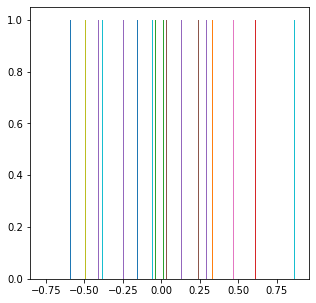

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(y_test-predictions)
plt.show()

As the model is normally distributed,it's working fine.

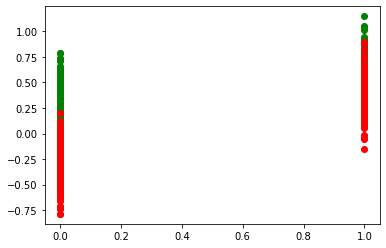

In [ ]:
plt.scatter(y_test,predictions,c='g')
plt.scatter(y_test,y_test-predictions,c='r')
plt.show()

## **Testing the performance of the model**

Mean absolute error

Mean squared error

Root mean squared error

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.mean_absolute_error(y_test, predictions))

0.31877069030825034


In [ ]:
print(metrics.mean_squared_error(y_test, predictions))

0.14477367276299655


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

0.38049135701484277


## **Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:
data=pd.read_csv('diabetes.csv')

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

As there are no interrelated columns we got values of Outcome itself either 1 or 0

In [ ]:
y_data=data['Outcome']
x_data=data.drop('Outcome',axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,stratify=y_data,random_state=5)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions=model.predict(x_train)

In [ ]:
train_data_accuracy=accuracy_score(predictions,y_train)

In [ ]:
print("accuracy score of the training data:",train_data_accuracy)

accuracy score of the training data: 0.7970204841713222


## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_Classifier=RandomForestClassifier()
RF_Classifier.fit(x_train,y_train)

In [ ]:
ypred_RF= RF_Classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
cm_rf=confusion_matrix(y_test,ypred_RF)
cm_rf

array([[128,  29],
       [ 27,  47]])

In [ ]:
score_rf=accuracy_score(y_test,ypred_RF)
print('accuracy based on RandomForest model',score_rf)

accuracy based on RandomForest model 0.7575757575757576


##  SAMPLE INPUT (1)

In [ ]:
input_data=(0,137.0,40.0,35.0,168.0,43.1,2.288,33)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print("The person does not have diabetes")
else:
   print("The person have diabete") 

[1]
The person have diabete


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


## SAMPLE INPUT(2)

In [ ]:
input_data=(1,89.0,66.0,23.0,94.0,28.1,0.167,21)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print("The person does not have diabetes")
else:
   print("The person have diabete") 

[0]
The person does not have diabetes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
input_data=(1,120.0,50.0,30.0,100.0,55.1,0.177,31)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print("The person does not have diabetes")
else:
   print("The person have diabete") 

[1]
The person have diabete


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
